<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/conner_tracy_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
install.packages("NHANES")
library(tidyverse)
library(NHANES)
set.seed(42)
df <- NHANES %>% sample_n(size = 5000) %>% mutate(PhysActiveDays = replace_na(PhysActiveDays, 0)) %>%
filter(!is.na(SleepHrsNight) & !is.na(Smoke100))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
df %>% colnames

[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeDecade"        "AgeMonths"        "Race1"            "Race3"           
 [9] "Education"        "MaritalStatus"    "HHIncome"         "HHIncomeMid"     
[13] "Poverty"          "HomeRooms"        "HomeOwn"          "Work"            
[17] "Weight"           "Length"           "HeadCirc"         "Height"          
[21] "BMI"              "BMICatUnder20yrs" "BMI_WHO"          "Pulse"           
[25] "BPSysAve"         "BPDiaAve"         "BPSys1"           "BPDia1"          
[29] "BPSys2"           "BPDia2"           "BPSys3"           "BPDia3"          
[33] "Testosterone"     "DirectChol"       "TotChol"          "UrineVol1"       
[37] "UrineFlow1"       "UrineVol2"        "UrineFlow2"       "Diabetes"        
[41] "DiabetesAge"      "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad" 
[45] "LittleInterest"   "Depressed"        "nPregnancies"     "nBabies"         
[49] "Age1stBaby"       "SleepHrsNight"    "SleepTrouble"     "PhysActive"      
[53] "PhysActiveDays"   "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"   
[57] "CompHrsDayChild"  "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
[61] "SmokeNow"         "Smoke100"         "Smoke100n"        "SmokeAge"        
[65] "Marijuana"        "AgeFirstMarij"    "RegularMarij"     "AgeRegMarij"     
[69] "HardDrugs"        "SexEver"          "SexAge"           "SexNumPartnLife" 
[73] "SexNumPartYear"   "SameSex"          "SexOrientation"   "PregnantNow"

In [19]:
df %>% count(SleepHrsNight)

SleepHrsNight,n
<int>,<int>
2,9
3,28
4,156
5,275
6,907
7,1120
8,1089
9,209
10,67


In [12]:
df %>% count(PhysActiveDays)

PhysActiveDays,n
<int>,<int>
1,156
2,234
3,333
4,191
5,235
6,82
7,197
NA,1572


$$
BMI = \beta_0 + \beta_1 DaysPhysicallyActive + \beta_2 Smoking + \beta_3 Gender + \beta_4 SleepHrsNight + \beta_5 Age
$$

Warning message:
“Removed 35 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 35 rows containing missing values or values outside the scale range
(`geom_point()`).”


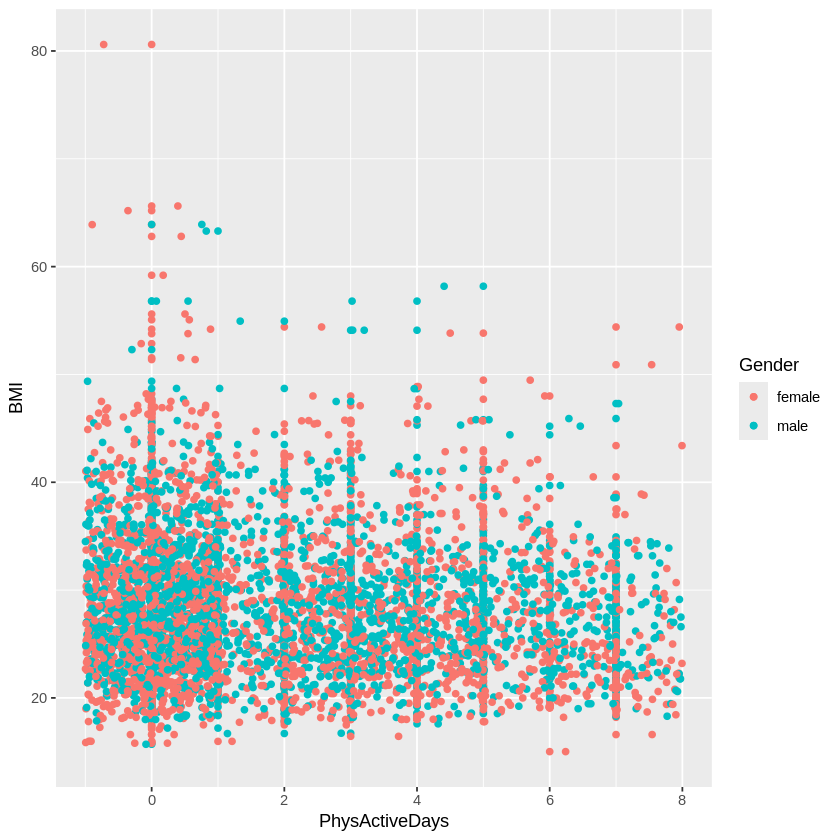

In [23]:
df %>% ggplot(aes(y=BMI, x=PhysActiveDays, color = Gender)) + geom_point() + geom_jitter(width = 1)

Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


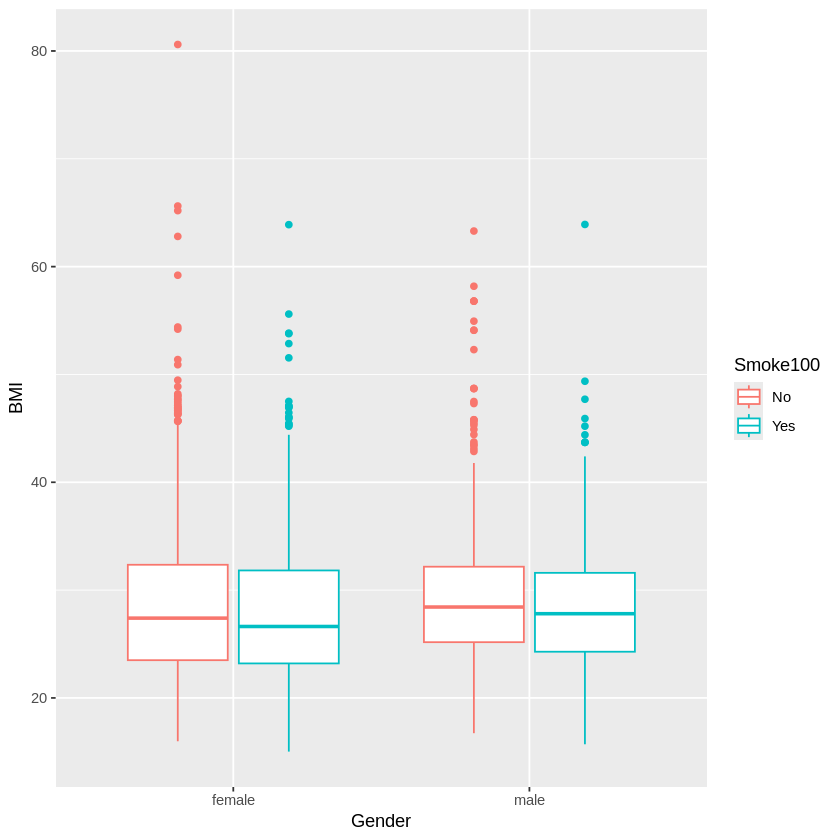

In [28]:
df %>% ggplot(aes(y=BMI, x=Gender, color = Smoke100)) + geom_boxplot()

Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


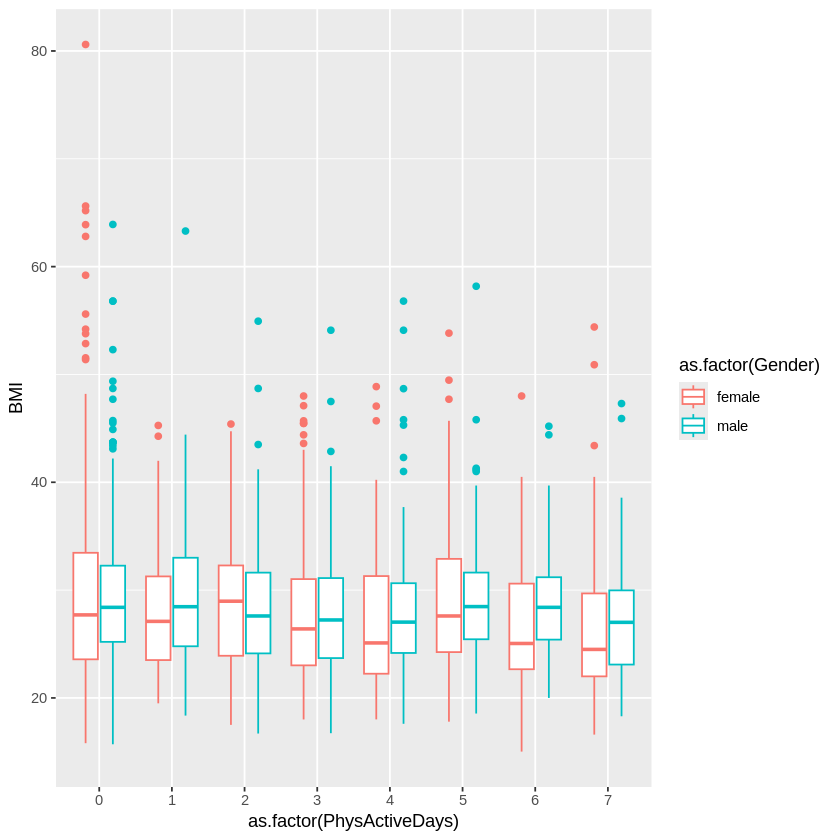

In [34]:
df %>% ggplot(aes(y=BMI, x=as.factor(PhysActiveDays), color = as.factor(Gender))) + geom_boxplot()

In [26]:
df %>% count(Smoke100)

Smoke100,n
<fct>,<int>
No,2014
Yes,1604
NA,260


In [35]:
model1 <- lm(BMI ~ PhysActiveDays, data=df)
summary(model1)


Call:
lm(formula = BMI ~ PhysActiveDays, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.463  -4.663  -0.980   3.336  51.437 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    29.16337    0.14089 206.991  < 2e-16 ***
PhysActiveDays -0.26120    0.04788  -5.455 5.22e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.515 on 3584 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.008235,	Adjusted R-squared:  0.007959 
F-statistic: 29.76 on 1 and 3584 DF,  p-value: 5.219e-08


In [36]:
model2 <- lm(BMI ~ PhysActiveDays + Gender, data=df)
summary(model2)


Call:
lm(formula = BMI ~ PhysActiveDays + Gender, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.598  -4.664  -1.049   3.342  51.566 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    29.03424    0.17655 164.454  < 2e-16 ***
PhysActiveDays -0.26166    0.04788  -5.465 4.94e-08 ***
Gendermale      0.26408    0.21760   1.214    0.225    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.514 on 3583 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.008643,	Adjusted R-squared:  0.00809 
F-statistic: 15.62 on 2 and 3583 DF,  p-value: 1.763e-07


In [37]:
model3 <- lm(BMI ~ PhysActiveDays + Gender + Smoke100, data=df)
summary(model3)


Call:
lm(formula = BMI ~ PhysActiveDays + Gender + Smoke100, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.331  -4.649  -1.004   3.340  51.289 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    29.31060    0.19798 148.048  < 2e-16 ***
PhysActiveDays -0.27055    0.04791  -5.647 1.76e-08 ***
Gendermale      0.34678    0.21901   1.583  0.11342    
Smoke100Yes    -0.67800    0.22079  -3.071  0.00215 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.507 on 3582 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.01125,	Adjusted R-squared:  0.01042 
F-statistic: 13.58 on 3 and 3582 DF,  p-value: 8.282e-09


In [39]:
model4 <- lm(BMI ~ PhysActiveDays + Gender + Smoke100 + Age, data=df)
summary(model4)


Call:
lm(formula = BMI ~ PhysActiveDays + Gender + Smoke100 + Age, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.783  -4.579  -1.032   3.354  51.640 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    28.561367   0.361399  79.030  < 2e-16 ***
PhysActiveDays -0.269632   0.047877  -5.632 1.92e-08 ***
Gendermale      0.372036   0.219092   1.698  0.08958 .  
Smoke100Yes    -0.725462   0.221467  -3.276  0.00106 ** 
Age             0.015941   0.006435   2.477  0.01328 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.502 on 3581 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.01294,	Adjusted R-squared:  0.01183 
F-statistic: 11.73 on 4 and 3581 DF,  p-value: 1.809e-09


In [41]:
model5 <- lm(BMI ~ PhysActiveDays + Gender + Smoke100 + Age + SleepHrsNight, data=df)
summary(model5)


Call:
lm(formula = BMI ~ PhysActiveDays + Gender + Smoke100 + Age + 
    SleepHrsNight, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.724  -4.603  -1.083   3.367  50.621 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    30.945358   0.662554  46.706  < 2e-16 ***
PhysActiveDays -0.263146   0.047785  -5.507 3.91e-08 ***
Gendermale      0.334472   0.218737   1.529 0.126327    
Smoke100Yes    -0.803850   0.221686  -3.626 0.000292 ***
Age             0.017621   0.006431   2.740 0.006176 ** 
SleepHrsNight  -0.351729   0.082013  -4.289 1.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.486 on 3580 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.01798,	Adjusted R-squared:  0.01661 
F-statistic: 13.11 on 5 and 3580 DF,  p-value: 1.126e-12


In [43]:
model6 <- lm(BMI ~ PhysActiveDays*Smoke100 + Gender + Age + SleepHrsNight, data=df)
summary(model6)


Call:
lm(formula = BMI ~ PhysActiveDays * Smoke100 + Gender + Age + 
    SleepHrsNight, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.561  -4.595  -1.064   3.354  50.488 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                31.08846    0.66814  46.530  < 2e-16 ***
PhysActiveDays             -0.32758    0.06189  -5.292 1.28e-07 ***
Smoke100Yes                -1.09623    0.28463  -3.851 0.000119 ***
Gendermale                  0.33936    0.21871   1.552 0.120830    
Age                         0.01760    0.00643   2.738 0.006214 ** 
SleepHrsNight              -0.35406    0.08201  -4.317 1.62e-05 ***
PhysActiveDays:Smoke100Yes  0.15930    0.09730   1.637 0.101671    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.485 on 3579 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.01872,	Adjusted R-squared:  0.01707 
F-statistic: 1

In [44]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
# Load the stargazer package
library(stargazer)

# Display the models in a single summary table
stargazer(model1, model2, model3, model4, model5, model6,
          type = "text",         # Use "html" or "latex" for publication
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6"),
          dep.var.caption = "Dependent Variable: BMI",
          align = TRUE,
          no.space = TRUE)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Regression Results
                                                                                          Dependent Variable: BMI                                                               
                           -----------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                    BMI                                                                         
                                   Model 1                  Model 2                  Model 3                  Model 4                  Model 5                  Model 6         
                                     (1)                      (2)                      (3)                      (4)                      (5)                      (6)           
-----------------------------------------------------------------------------------------------

In [46]:
# Display the models in a single summary table
stargazer(model1, model2, model3, model4, model5, model6,
          type = "latex",         # Use "html" or "latex" for publication
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6"),
          dep.var.caption = "Dependent Variable: BMI",
          align = TRUE,
          no.space = TRUE)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Fri, Apr 04, 2025 - 06:33:27 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Regression Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{Dependent Variable: BMI} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{6}{c}{BMI} \\ 
 & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3} & \multicolumn{1}{c}{Model 4} & \multicolumn{1}{c}{Model 5} & \multicolumn{1}{c}{Model 6} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)} & \multicolumn{1}{c}{(4)} & \multicolumn{1}{c}{(5)} & \multicolumn{1}{c}{(6)}\\ 
\hline \\[-1.8ex] 
 PhysActiveDays & -0.261^{***} & -0.262^{***} & -0.271^{***} & -0.270^{***} & -0.263^{***} & -0.